In [1]:
import tensorflow as tf

In [2]:
import tensorflow_datasets as tfds

In [3]:
datasets = tfds.load("cifar10")
train_dataset, test_dataset = datasets["train"], datasets["test"]
assert isinstance(train_dataset, tf.data.Dataset)

In [4]:
import IPython.display as display
import numpy as np
import matplotlib.pyplot as plt
import os

In [5]:
cifar10_builder = tfds.builder('cifar10')

In [6]:
info = cifar10_builder.info

In [7]:
print(info)

tfds.core.DatasetInfo(
    name='cifar10',
    version=1.0.2,
    description='The CIFAR-10 dataset consists of 60000 32x32 colour images in 10 classes, with 6000 images per class. There are 50000 training images and 10000 test images.',
    urls=['https://www.cs.toronto.edu/~kriz/cifar.html'],
    features=FeaturesDict({
        'image': Image(shape=(32, 32, 3), dtype=tf.uint8),
        'label': ClassLabel(shape=(), dtype=tf.int64, num_classes=10),
    }),
    total_num_examples=60000,
    splits={
        'test': 10000,
        'train': 50000,
    },
    supervised_keys=('image', 'label'),
    citation="""@TECHREPORT{Krizhevsky09learningmultiple,
        author = {Alex Krizhevsky},
        title = {Learning multiple layers of features from tiny images},
        institution = {},
        year = {2009}
    }""",
    redistribution_info=,
)



In [8]:
info.features['label'].names

['airplane',
 'automobile',
 'bird',
 'cat',
 'deer',
 'dog',
 'frog',
 'horse',
 'ship',
 'truck']

In [9]:
info.features['label'].int2str(0)

'airplane'

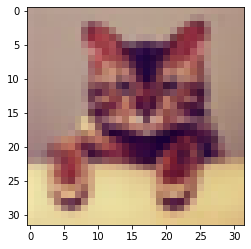

3
[[[184 159 149]
  [181 157 146]
  [182 158 145]
  ...
  [180 152 138]
  [179 151 137]
  [178 149 135]]

 [[181 157 147]
  [179 155 144]
  [179 155 142]
  ...
  [177 149 135]
  [177 149 135]
  [176 148 133]]

 [[182 158 148]
  [179 155 144]
  [179 155 143]
  ...
  [178 150 136]
  [177 149 135]
  [176 148 134]]

 ...

 [[240 227 168]
  [235 221 164]
  [233 220 162]
  ...
  [226 202 139]
  [225 199 139]
  [224 197 138]]

 [[238 221 164]
  [233 217 161]
  [233 217 160]
  ...
  [222 195 133]
  [223 193 134]
  [221 190 133]]

 [[233 216 158]
  [230 213 157]
  [231 214 158]
  ...
  [222 191 130]
  [221 188 130]
  [219 185 129]]]


In [10]:
for example in train_dataset.take(1):  # Only take a single example
    plt.imshow(example['image'].numpy())
    plt.show()
    print(example['label'].numpy())
    print(example['image'].numpy())

In [11]:
for batch in train_dataset.batch(50000):
    x_train = batch['image']
    y_train = batch['label'].numpy().astype('uint8')

In [12]:
x_train[5000].numpy()

array([[[156, 166, 181],
        [153, 166, 179],
        [153, 168, 181],
        ...,
        [ 91, 141, 173],
        [ 75, 134, 166],
        [ 61, 126, 163]],

       [[163, 172, 187],
        [160, 171, 185],
        [157, 171, 184],
        ...,
        [104, 153, 186],
        [ 91, 145, 179],
        [ 77, 137, 174]],

       [[163, 171, 184],
        [168, 178, 189],
        [161, 174, 184],
        ...,
        [117, 162, 193],
        [106, 153, 187],
        [ 94, 146, 181]],

       ...,

       [[141, 143, 148],
        [132, 140, 148],
        [131, 140, 149],
        ...,
        [171, 172, 176],
        [171, 172, 177],
        [168, 174, 181]],

       [[147, 148, 150],
        [133, 139, 147],
        [132, 139, 149],
        ...,
        [170, 171, 175],
        [171, 172, 177],
        [171, 174, 182]],

       [[154, 154, 153],
        [132, 137, 143],
        [130, 136, 145],
        ...,
        [166, 167, 172],
        [168, 170, 174],
        [169, 171, 177]]

In [13]:
y_train[5000]

0

In [14]:
y_train

array([3, 9, 3, ..., 9, 3, 7], dtype=uint8)

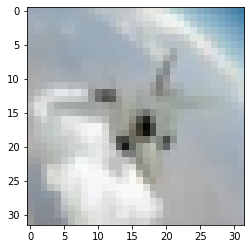

In [15]:
plt.imshow(x_train[5000].numpy())
plt.show()

In [16]:
for batch in test_dataset.batch(10000):
    x_test = batch['image']
    y_test = batch['label'].numpy().astype('uint8')

In [17]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(32,32,3)),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(x_train, y_train, epochs=5)

Train on 50000 samples
Epoch 1/5
50000/50000 [==============================] - 6s 114us/sample - loss: 5.4468 - accuracy: 0.0999
Epoch 2/5
50000/50000 [==============================] - 5s 105us/sample - loss: 2.3028 - accuracy: 0.0990
Epoch 3/5
50000/50000 [==============================] - 5s 108us/sample - loss: 2.3028 - accuracy: 0.1003
Epoch 4/5
50000/50000 [==============================] - 6s 113us/sample - loss: 2.3027 - accuracy: 0.0977
Epoch 5/5
50000/50000 [==============================] - 6s 115us/sample - loss: 2.3029 - accuracy: 0.0963


In [18]:
model.evaluate(x_test, y_test, verbose=0)

[2.302613898086548, 0.1]

In [30]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')  
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(x_train, y_train, epochs=5)

Train on 50000 samples
Epoch 1/5
50000/50000 [==============================] - 35s 696us/sample - loss: 1.7304 - accuracy: 0.3995
Epoch 2/5
50000/50000 [==============================] - 37s 746us/sample - loss: 1.3061 - accuracy: 0.5367
Epoch 3/5
50000/50000 [==============================] - 37s 736us/sample - loss: 1.1527 - accuracy: 0.5946
Epoch 4/5
50000/50000 [==============================] - 37s 740us/sample - loss: 1.0440 - accuracy: 0.6350
Epoch 5/5
50000/50000 [==============================] - 36s 716us/sample - loss: 0.9706 - accuracy: 0.6613


In [28]:
model.evaluate(x_test, y_test, verbose=0)

[1.106642893600464, 0.6273]

In [29]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 13, 13, 64)        18496     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 2304)              0         
_________________________________________________________________
dense_6 (Dense)              (None, 64)                147520    
_________________________________________________________________
dense_7 (Dense)              (None, 10)               